In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

In [2]:
games = pd.read_csv('video-games.csv', encoding='utf-8')

In [3]:
# Questões a serem respondidas
# - Número de vendas (global) por gênero
# - Vendas por continente
# - Vendas por publisher

In [4]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Organização dos dados
indexMissingElements = games['Year'].index[games['Year'].apply(np.isnan)]

In [8]:
games[games['Genre'] == 'Strategy']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
165,166,Pokemon Stadium,N64,1999.0,Strategy,Nintendo,3.18,1.24,0.94,0.09,5.45
204,205,Warzone 2100,PS,1999.0,Strategy,Eidos Interactive,2.79,1.89,0.00,0.33,5.01
217,218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.56,1.68,0.00,0.59,4.83
267,268,Warcraft II: Tides of Darkness,PC,1995.0,Strategy,Activision,1.70,2.27,0.00,0.23,4.21
335,336,Pokémon Trading Card Game,GB,1998.0,Strategy,Nintendo,1.49,0.73,1.38,0.10,3.70
...,...,...,...,...,...,...,...,...,...,...,...
16510,16513,Palais de Reine,PS2,2007.0,Strategy,Interchannel-Holon,0.00,0.00,0.01,0.00,0.01
16532,16535,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01
16539,16542,Spore Galactic Adventures,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16555,16558,Codename: Panzers Complete Collection,PC,2016.0,Strategy,Nordic Games,0.00,0.01,0.00,0.00,0.01


In [21]:
# Estrutura do DataFrame

genres = games["Genre"].unique()
dictGenresAndSale = {}

for item in dictGenresAndSale:
    dictGenresAndSale.update({item: 0})
    
genres

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [24]:
# Função para obter os índices dos valores que foram 
# passados como parâmetro, retornando o índice e a coluna
# a qual o valor pertence

def getIndexes(dfObj, value): 
    listOfPositions = []
    result = dfObj.isin([value])
    seriesResult = result.any()
    columnNames = list(seriesResult[seriesResult == True].index)
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPositions.append((row, col))
    return listOfPositions

In [25]:
for genre in genres:
    amount = 0
    indexes = getIndexes(games, genre)
    for index in indexes:
        amount += games['Global_Sales'][index[0]]
    dictGenresAndSale.update([(genre, amount)])

In [ ]:
indexes = getIndexes(games, "Strategy")
amount = 0
for index in indexes:
    amount += games['Global_Sales'][index[0]]
    print(amount)

In [290]:
salesByGenre = pd.DataFrame(dictGenresAndSale.items(), columns=['Genre', 'GlobalSales'])

In [301]:
salesByGenre.sort_values(by=['GlobalSales'], inplace=True)

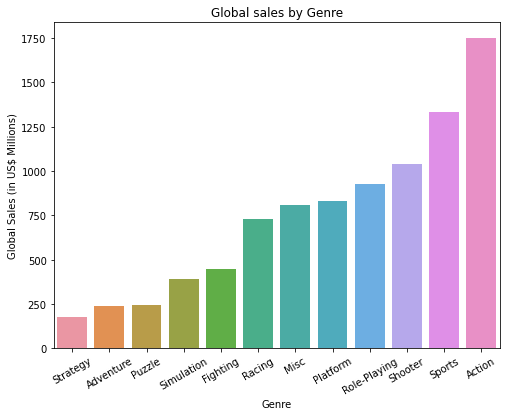

In [302]:
fig , ax = plt.subplots(figsize=(8,6))
ax = plt.axes()
plot = sea.barplot(x=salesByGenre["Genre"], y=salesByGenre["GlobalSales"], ax=ax)
ax.set_title('Global sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in US$ Millions)')
plt.xticks(rotation=30)
plt.show()

# 